In [2]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

In [4]:
# Load csv file
df = pd.read_csv('/content/drive/MyDrive/NLP project/Amazon_Unlocked_Mobile.csv')
df.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0
7,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0
8,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0
9,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,It's battery life is great. It's very responsi...,0.0


In [5]:
df.describe()

,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [6]:
print("Total reviews: ",len(df))

Total reviews:  413840


In [7]:
print("Total unique products: ", len(list(set(df['Product Name']))))

Total unique products:  4410


In [8]:
print("Total brands: ", len(list(set(df['Brand Name']))))


Total brands:  385


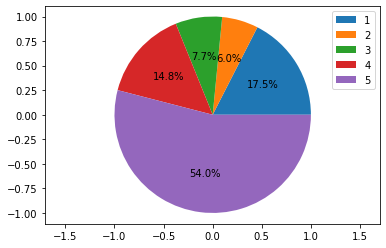

In [9]:
fg,ax=plt.subplots()
ax.pie(df['Rating'].value_counts().sort_index(),autopct='%1.1f%%',frame=True)
ax.legend([1,2,3,4,5],loc='upper right')
ax.axis('equal')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


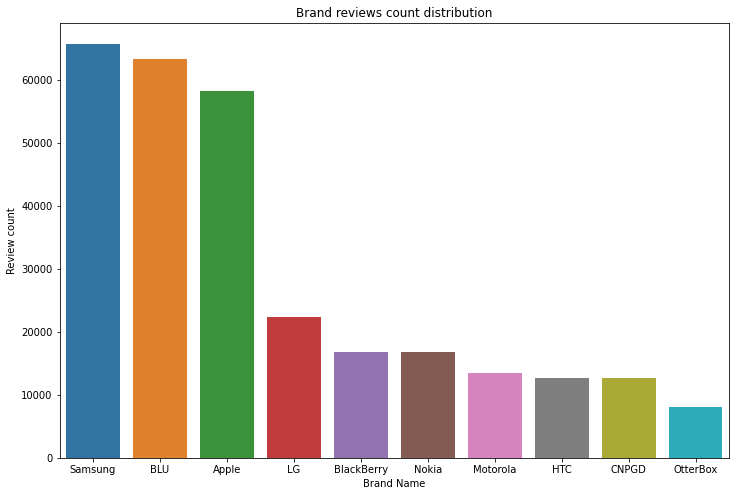

In [10]:
#number of review for top 10 brands
import seaborn as sns
plt.figure(figsize=(12,8))
brands = df["Brand Name"].value_counts()
freq=[]
items=[]
for i in brands[:10]:
   freq.append(i)
c=0

for i in dict(brands):
  if (c<10):
    c+=1
    items.append(i)


# sns.barplot(freq,items)
sns.barplot(items,freq)
plt.xlabel('Brand Name')
plt.ylabel('Review count')
plt.title('Brand reviews count distribution')
plt.show()

Text(0, 0.5, 'number of characters')

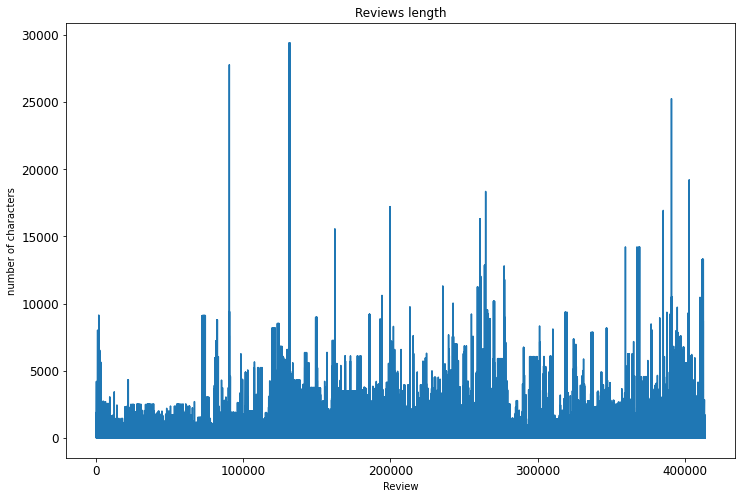

In [11]:
# plot distribution for reviews length
ax = df["Reviews"].dropna().map(lambda x: len(x)).plot(figsize=(12, 8) ,title='Reviews length',fontsize=12)
ax.set_xlabel("Review")
ax.set_ylabel("number of characters")

Text(0.5, 1.0, 'Reviews count for Top 10 Products')

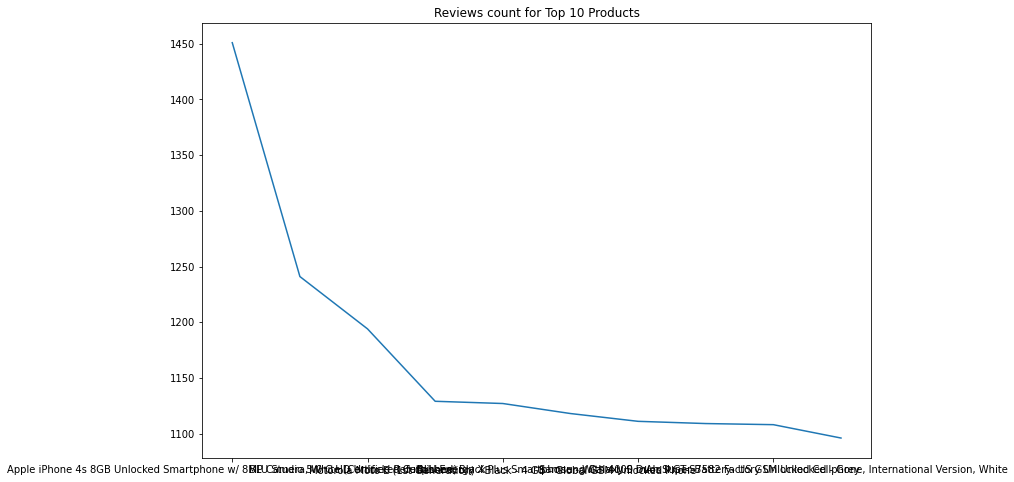

In [12]:
# top 10 products review count
plt.figure(figsize=(12,8))
df["Product Name"].value_counts()[:10].plot(kind='line')
plt.title("Reviews count for Top 10 Products")

In [13]:
# average ratings of a product
ref = df.groupby(by=['Product Name'], as_index=False).agg({"Rating":"mean"})
ref

,Product Name,Rating
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",3.702703
1,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",4.205479
2,'ATT Wireless LG CU720 Shine for in Red',4.400000
3,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,4.125000
4,"(LANDVO) 5.0"" Capacitive Touch MTK6582 Quad Co...",4.250000
...,...,...
4405,"verykool s5017 Dorado 4G HSPA+ 5.0"" IPS LCD Un...",3.738095
4406,"verykool s505 Spark 5.0"" IPS TFT LCD 1.3GHz Qu...",3.250000
4407,verykool s5510 Juno HSPA+ Factory Unlocked GSM...,3.867647
4408,"verykool s5511 Juno Quatro 5.5"" LCD 4G Unlocke...",3.800000


In [14]:
# #first two reviews of a product
# df_product = df.groupby(['Product Name'])
# c=0
# for i in df_product:
#   if (c<2):
#     c+=1
#     print(f"First 2 entries for {i!r}")
#     print("------------------------")
#     print(i, end="\n\n")


In [15]:
# products with max ratings
# val = df.groupby(by=['Product Name'], as_index=False) HAVING df['Rating']=5
# val

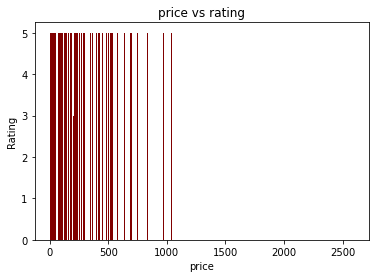

In [16]:
#price vs rating
import numpy as np
import matplotlib.pyplot as plt
# creating the bar plot
plt.bar(df["Price"], df["Rating"], color ='maroon',width = 0.4)
plt.xlabel("price")
plt.ylabel("Rating")
plt.title("price vs rating")
plt.show()

In [17]:
df["Price"].mean()

226.86715538100597

In [18]:
df["Price"].describe()

count    407907.000000
mean        226.867155
std         273.006259
min           1.730000
25%          79.990000
50%         144.710000
75%         269.990000
max        2598.000000
Name: Price, dtype: float64

In [19]:
df['Reviews'].isnull().values.any()

True

In [20]:
df['Reviews']=df['Reviews'].fillna("")

In [28]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

review=[]
for i_review in df['Reviews']:
  words=nltk.word_tokenize(i_review)
  # words = [t for t in i_review.split() if t.isalpha()]
  # remove all stopwords
  for token in words:
    if token.lower() in stopwords.words('english'):
        words.remove(to ken)
    else:
      review.append(token)
  # for word in words:
  #   review.append(word)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
review

['found',
 '(',
 'phone',
 '&',
 'hard',
 ')',
 ',',
 'phone',
 '.',
 'liked',
 'one',
 'fell',
 'apart',
 'years',
 "n't",
 'want',
 '!',
 '!',
 'Thank',
 ',',
 'appreciate',
 'said',
 'used',
 'phone.I',
 'recommend',
 '&',
 'would',
 '!',
 '!',
 'nice',
 'phone',
 ',',
 'nice',
 'pantach',
 'revue',
 '.',
 'set',
 'easy',
 'set',
 'never',
 'android',
 'phone',
 '.',
 'perfect',
 'size',
 'media',
 '.',
 'great',
 'phone',
 'samsung',
 'good',
 'goes',
 'slow',
 'sometimes',
 'good',
 'phone',
 'Great',
 'phone',
 'phone',
 '.',
 'thing',
 'volume',
 'work',
 ',',
 'go',
 '.',
 'again.Thaanks',
 '!',
 'phone',
 '...',
 'used',
 ',',
 ',',
 'charge',
 '.',
 'would',
 'purchased',
 '....',
 'cracked',
 'side',
 '..',
 'damaged',
 'goods',
 '....',
 'way',
 'work',
 'requesting',
 'money',
 'back',
 '...',
 'BACK',
 '...',
 'SIGNED',
 'CUSTOMER',
 '....',
 'port',
 '.',
 'battery',
 '.',
 '$',
 '100',
 'later',
 '(',
 'cost',
 ')',
 'phone',
 '.',
 'sold',
 'state',
 'Phone',
 'looks',

[('.', 813367), (',', 517649), ('phone', 236632), ('!', 161869), ("n't", 72172), (')', 63644), ('(', 59265), ('great', 45803), ('good', 43517), ('like', 43101)]


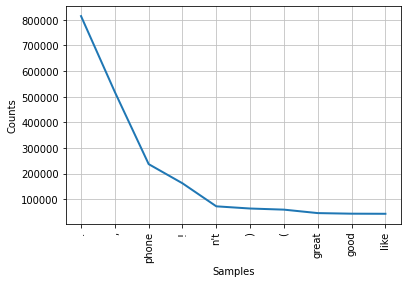

In [30]:
freq = nltk.FreqDist(review)
print(freq.most_common(10))
freq.plot(10, cumulative=False)